## **Problem Statement:**

You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.

**Lab Environment:** Anaconda

**Domain:** Telecom

### **Tasks To Be Performed:**
**1. Data Manipulation:**

> ● Extract the 5th column and store it in ‘customer_5’

> ● Extract the 15th column and store it in ‘customer_15’

> ● Extract all the male senior citizens whose payment method is electronic
check and store the result in ‘senior_male_electronic’

> ● Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’

> ● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

> ● Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’

> ● Get the count of different levels from the ‘Churn’ column

**2. Data Visualization:**

> ● Build a bar-plot for the ’InternetService’ column:

>> a. Set x-axis label to ‘Categories of Internet Service’

>> b. Set y-axis label to ‘Count of Categories’

>> c. Set the title of plot to be ‘Distribution of Internet Service’

>> d. Set the color of the bars to be ‘orange’

> ● Build a histogram for the ‘tenure’ column:

>> a. Set the number of bins to be 30

>> b. Set the color of the bins to be ‘green’

>> c. Assign the title ‘Distribution of tenure’

> ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:

>> a. Assign the points a color of ‘brown’

>> b. Set the x-axis label to ‘Tenure of customer’

>> c. Set the y-axis label to ‘Monthly Charges of customer’

>> d. Set the title to ‘Tenure vs Monthly Charges’

>> e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &

>> f. ‘Contract’ on the x-axis.

**3. Linear Regression:**

> ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:

>> a. Divide the dataset into train and test sets in 70:30 ratio.

>> b. Build the model on train set and predict the values on test set

>> c. After predicting the values, find the root mean square error

>> d. Find out the error in prediction & store the result in ‘error’

>> e. Find the root mean square error

**4. Logistic Regression:**

> ● Build a simple logistic regression model where dependent variable is
‘Churn’ and independent variable is ‘MonthlyCharges’:

>> a. Divide the dataset in 65:35 ratio

>> b. Build the model on train set and predict the values on test set

>> c. Build the confusion matrix and get the accuracy score

>> d. Build a multiple logistic regression model where dependent variable
is ‘Churn’ and independent variables are ‘tenure’ and
‘MonthlyCharges’

>> e. Divide the dataset in 80:20 ratio

>> f. Build the model on train set and predict the values on test set

>> g. Build the confusion matrix and get the accuracy score

**5. Decision Tree:**

> ● Build a decision tree model where dependent variable is ‘Churn’ and
independent variable is ‘tenure’:

>> a. Divide the dataset in 80:20 ratio

>> b. Build the model on train set and predict the values on test set

>> c. Build the confusion matrix and calculate the accuracy

**6. Random Forest:**

> ● Build a Random Forest model where dependent variable is ‘Churn’ and
independent variables are ‘tenure’ and ‘MonthlyCharges’:

>> a. Divide the dataset in 70:30 ratio

>> b. Build the model on train set and predict the values on test set

>> c. Build the confusion matrix and calculate the accuracy

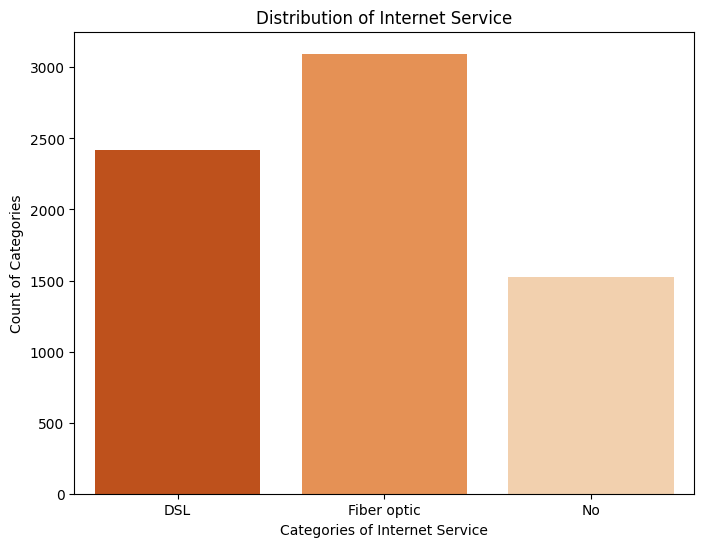

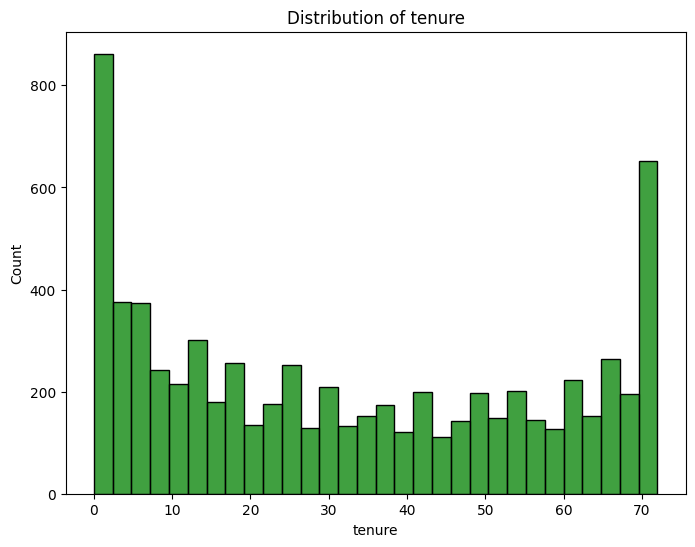

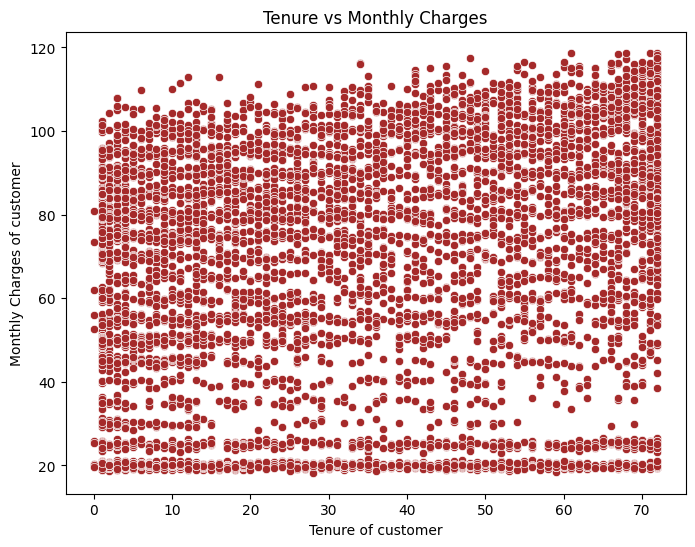

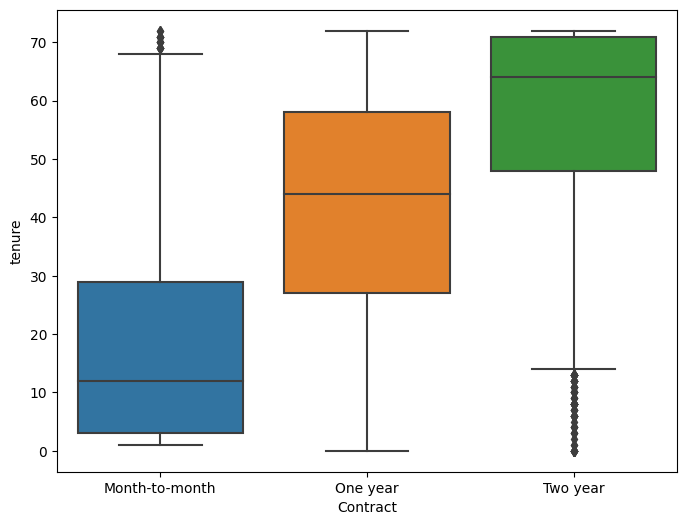

Root Mean Squared Error for Linear Regression:  29.36317950204527
Accuracy for Logistic Regression:  0.7686302342086586
Accuracy for Decision Tree:  0.7572746628814763
Accuracy for Random Forest:  0.7496450544249882


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

# Task 1: Data Manipulation
customer_5 = df.iloc[:, 4]  # Extract the 5th column
customer_15 = df.iloc[:, 14]  # Extract the 15th column

# Extract all the male senior citizens whose payment method is electronic check
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]

# Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

# Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]

# Extract 333 random records from the customer_churn dataframe
customer_333 = df.sample(n=333)

# Get the count of different levels from the ‘Churn’ column
churn_counts = df['Churn'].value_counts()

# Task 2: Data Visualization
# Build a bar-plot for the ’InternetService’ column:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='InternetService', palette='Oranges_r')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

# Build a histogram for the ‘tenure’ column:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tenure', bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

# Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

# Build a box-plot between ‘tenure’ & ‘Contract’:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Contract', y='tenure')
plt.show()

# Task 3: Linear Regression
X = df[['tenure']]
y = df['MonthlyCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error for Linear Regression: ", error)

# Task 4: Logistic Regression
X = df[['MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)


X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for Logistic Regression: ", accuracy)

# Task 5: Decision Tree:
X = df[['tenure']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for Decision Tree: ", accuracy)

# Task 6: Random Forest:
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy for Random Forest: ", accuracy)


In [ ]:
from joblib import dump

# Save models
dump(lr, 'linear_regression.joblib')
dump(logreg, 'logistic_regression.joblib')
dump(dtree, 'decision_tree.joblib')
dump(rf, 'random_forest.joblib')

['random_forest.joblib']

# **DOCUMENTATION**

## Overview
This Python script performs data manipulation, visualization, and modeling on the Telco Customer Churn dataset from Kaggle. The goal is to analyze the data and find insights to prevent customers from churning out to other telecom companies.

## Libraries Used
- pandas: For data manipulation and analysis.
- numpy: For numerical operations.
- matplotlib.pyplot: For creating static, animated, and interactive visualizations.
- seaborn: For statistical data visualization based on matplotlib.
- sklearn.model_selection.train_test_split: For splitting the dataset into training set and test set.
- sklearn.linear_model.LinearRegression, LogisticRegression: For performing linear and logistic regression.
- sklearn.metrics.mean_squared_error, confusion_matrix, accuracy_score: For calculating metrics to evaluate the models.
- sklearn.tree.DecisionTreeClassifier: For building a decision tree model.
- sklearn.ensemble.RandomForestClassifier: For building a random forest model.

## Data Manipulation (Task 1)
The script performs various data extraction tasks such as extracting specific columns, selecting rows based on certain conditions, and sampling random records from the dataframe.

## Data Visualization (Task 2)
The script creates several plots to visualize the distribution of various features in the dataset. It uses bar plots, histograms, scatter plots, and box plots for this purpose.

## Linear Regression (Task 3)
The script builds a simple linear regression model where the dependent variable is 'MonthlyCharges' and the independent variable is 'tenure'. It calculates the Root Mean Squared Error for this model.

## Logistic Regression (Task 4)
The script builds two logistic regression models:
1. A simple logistic regression model where the dependent variable is 'Churn' and the independent variable is 'MonthlyCharges'.
2. A multiple logistic regression model where the dependent variable is 'Churn' and independent variables are 'tenure' and 'MonthlyCharges'.
It calculates the accuracy for both models.

## Decision Tree (Task 5)
The script builds a decision tree model where the dependent variable is 'Churn' and independent variable is 'tenure'. It calculates the accuracy for this model.

## Random Forest (Task 6)
The script builds a random forest model where the dependent variable is 'Churn' and independent variables are 'tenure' and 'MonthlyCharges'. It calculates the accuracy for this model.

## Output
The output of this script includes several plots visualizing different aspects of the data, as well as accuracy scores for different models:
- Root Mean Squared Error for Linear Regression: 29.36317950204527
- Accuracy for Logistic Regression: 0.7686302342086586
- Accuracy for Decision Tree: 0.7572746628814763
- Accuracy for Random Forest: 0.7496450544249882

